In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.xlsx
/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.csv


# Data and libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
df = pd.read_csv('/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.csv')
df.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [4]:
df.shape

(300, 17)

In [5]:
df.columns

Index(['Rank', 'Ordinal Rank', 'University Name', 'Overall Score', 'City',
       'Country', 'Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty',
       'Employer Reputation'],
      dtype='object')

In [6]:
df.describe()

,Rank,Ordinal Rank,Overall Score,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,294.000000,300.000000,296.000000,300.000000,300.000000,283.000000,300.000000
mean,150.500000,150.133333,52.057667,44.869667,41.288667,51.648000,50.976333,53.959524,60.108333,35.779054,38.573667,35.303667,38.437456,54.646000
std,86.746758,86.556739,19.123336,34.088756,29.994062,26.305925,31.338651,35.002787,31.179020,31.477270,34.467015,36.086228,30.571068,29.915534
min,1.000000,1.000000,29.000000,1.000000,1.200000,8.800000,2.600000,1.000000,1.100000,1.300000,1.000000,1.000000,1.000000,4.100000
25%,75.750000,75.750000,35.850000,11.075000,14.500000,30.100000,21.750000,15.850000,33.475000,9.175000,8.300000,3.300000,12.800000,28.150000
50%,150.500000,150.500000,46.250000,39.050000,36.750000,45.150000,47.850000,62.300000,67.100000,23.950000,28.100000,20.100000,29.500000,53.050000
75%,225.250000,225.250000,62.725000,76.150000,61.775000,67.550000,80.300000,86.800000,88.675000,58.100000,62.925000,67.800000,56.850000,81.850000
max,300.000000,300.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
print("Missing Values:\n", df.isnull().sum())

df = df.dropna()  

print("Duplicate Rows: ", df.duplicated().sum())
df = df.drop_duplicates()

# Convert categorical columns to appropriate types
categorical_columns = ['City', 'Country']
for col in categorical_columns:
    df[col] = df[col].astype('category')


Missing Values:
 Rank                              0
Ordinal Rank                      0
University Name                   0
Overall Score                     0
City                              0
Country                           0
Citations per Paper               0
Papers per Faculty                0
Academic Reputation               0
Faculty Student Ratio             0
Staff with PhD                    6
International Research Center     0
International Students            4
Outbound Exchange                 0
Inbound Exchange                  0
International Faculty            17
Employer Reputation               0
dtype: int64
Duplicate Rows:  0


# EDA

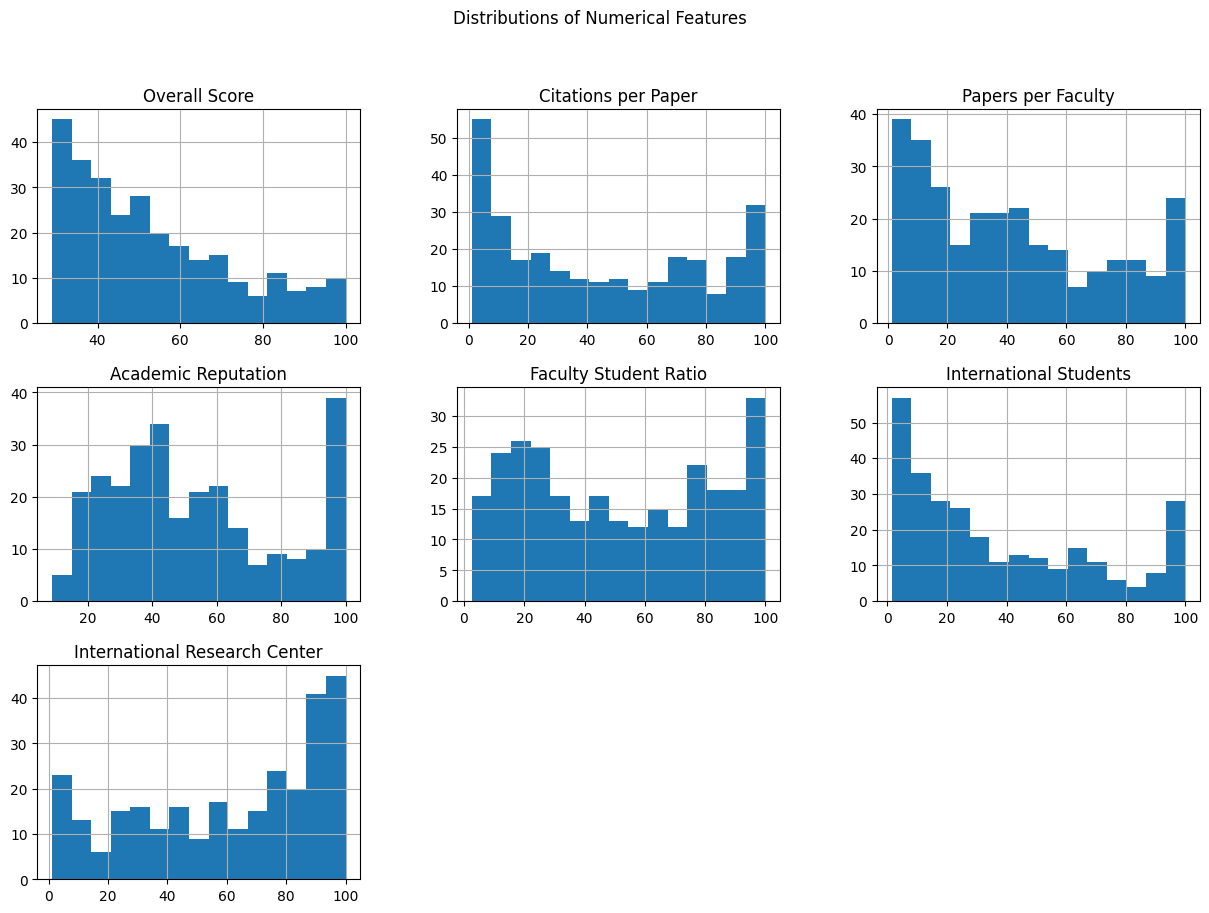

In [8]:
# Histogram for numerical features
numerical_columns = ['Overall Score', 'Citations per Paper', 'Papers per Faculty', 
                     'Academic Reputation', 'Faculty Student Ratio', 'International Students', 'International Research Center']
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distributions of Numerical Features')
plt.show()
from scipy import stats

                                               Feature  Coefficient  \
4                                  Academic Reputation     3.282133   
0                                                 Rank    -2.801761   
12                                 Employer Reputation     2.690214   
1                                         Ordinal Rank    -2.672899   
7                        International Research Center     1.856430   
..                                                 ...          ...   
65              University Name_Ewha Womans University    -0.003639   
356                                City_Kaohsiung City    -0.002927   
314                                    City_Chiang Mai     0.002448   
471                                     Country_Taiwan     0.001312   
91   University Name_Indian Institute of Technology...     0.001064   

     Abs Coefficient  
4           3.282133  
0           2.801761  
12          2.690214  
1           2.672899  
7           1.856430  
..       

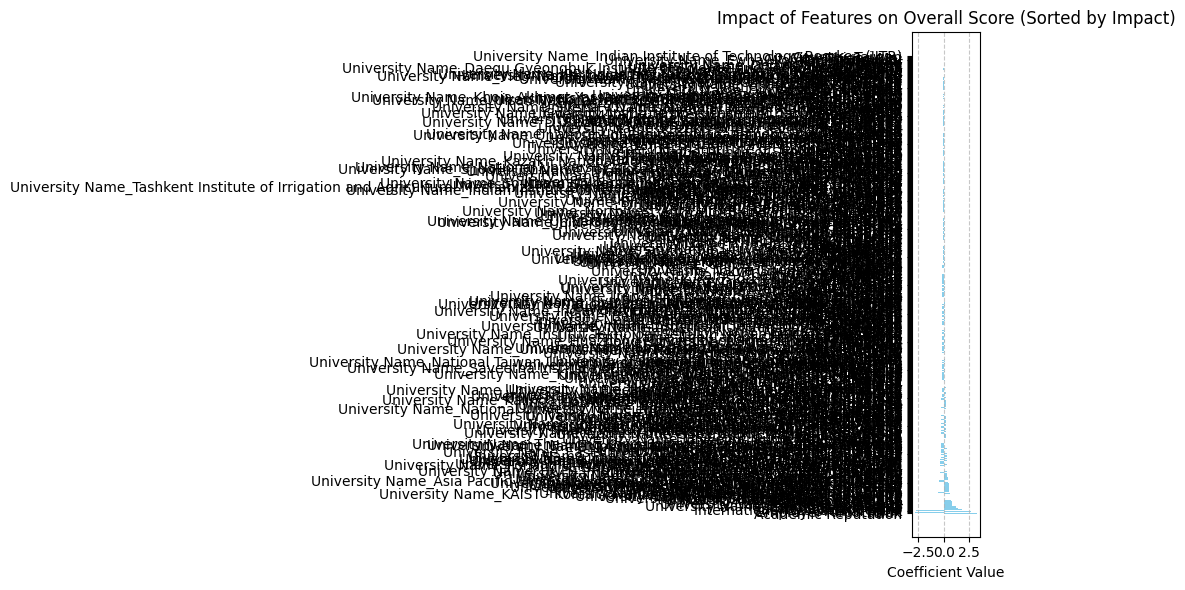

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# サンプルデータの準備（データフレームdfを使用）
# 'Overall Score'列は目的変数、他の列は特徴量
features = df.drop(columns=['Overall Score'])  # 'Overall Score'以外の指標を対象
target = df['Overall Score']  # 目的変数（Overall Score）

# カテゴリカルな特徴量（文字列）をダミー変数（ワンホットエンコーディング）に変換
features = pd.get_dummies(features, drop_first=True)

# データを標準化（回帰モデルでは標準化が効果的な場合が多い）
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 線形回帰モデルを作成
model = LinearRegression()
model.fit(scaled_features, target)

# 各特徴量の回帰係数（どれくらい影響しているか）を確認
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})

# 絶対値を基に係数を並べ替え（影響度合い順）
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=False)

# 結果の表示
print(coefficients)

# 各特徴量の影響をバーグラフで可視化（影響度順）
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Features on Overall Score (Sorted by Impact)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                          Feature  Coefficient  Abs Coefficient
9           International Faculty     0.794750         0.794750
6          International Students     0.819141         0.819141
7               Outbound Exchange     0.891527         0.891527
8                Inbound Exchange     0.941417         0.941417
1              Papers per Faculty     1.569031         1.569031
4                  Staff with PhD     1.827105         1.827105
3           Faculty Student Ratio     3.212481         3.212481
5   International Research Center     3.279596         3.279596
0             Citations per Paper     3.565160         3.565160
10            Employer Reputation     6.214583         6.214583
2             Academic Reputation     8.183872         8.183872


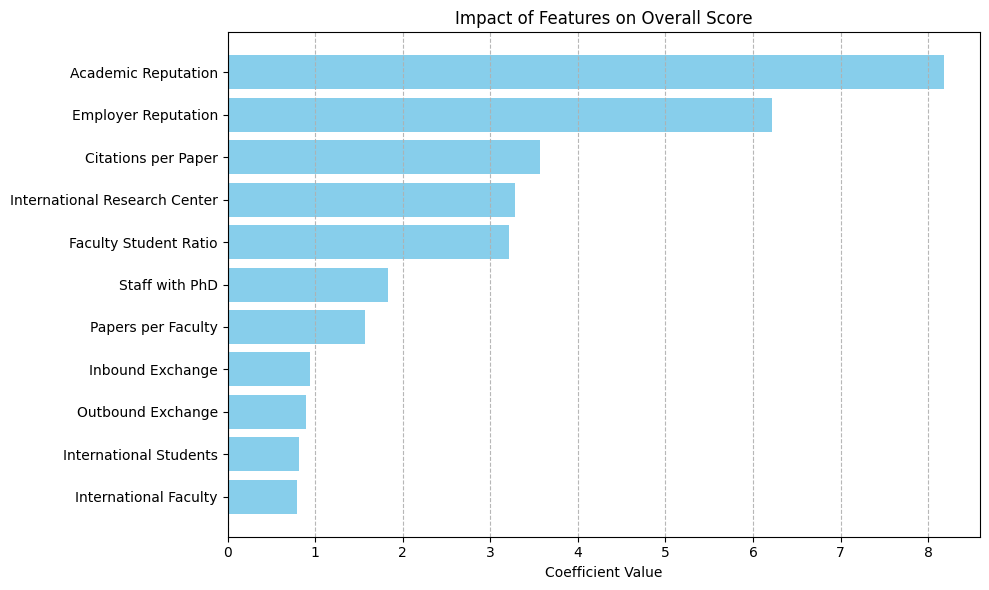

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# サンプルデータの準備（データフレームdfを使用）
# 'Overall Score'列は目的変数、他の列は特徴量
features = df.drop(columns=['Overall Score', 'University Name','City','Country','Rank','Ordinal Rank'])  # 'Overall Score'以外の指標を対象
target = df['Overall Score']  # 目的変数（Overall Score）

# データを標準化（回帰モデルでは標準化が効果的な場合が多い）
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 線形回帰モデルを作成
model = LinearRegression()
model.fit(scaled_features, target)

# 各特徴量の回帰係数（どれくらい影響しているか）を確認
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})

# 絶対値を基に係数を並べ替え（影響度合い順）
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=True)

# 結果の表示
print(coefficients)

# 各特徴量の影響をバーグラフで可視化（影響度順）
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Impact of Features on Overall Score')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()



Regression Coefficients (Impact on Overall Score):
                          Feature  Coefficient  Abs Coefficient
1                    Ordinal Rank    -0.090732         0.090732
0                            Rank     0.091477         0.091477
11          International Faculty     0.794790         0.794790
8          International Students     0.819191         0.819191
9               Outbound Exchange     0.891588         0.891588
10               Inbound Exchange     0.941516         0.941516
3              Papers per Faculty     1.569176         1.569176
6                  Staff with PhD     1.827211         1.827211
5           Faculty Student Ratio     3.212597         3.212597
7   International Research Center     3.279748         3.279748
2             Citations per Paper     3.565179         3.565179
12            Employer Reputation     6.214880         6.214880
4             Academic Reputation     8.184041         8.184041


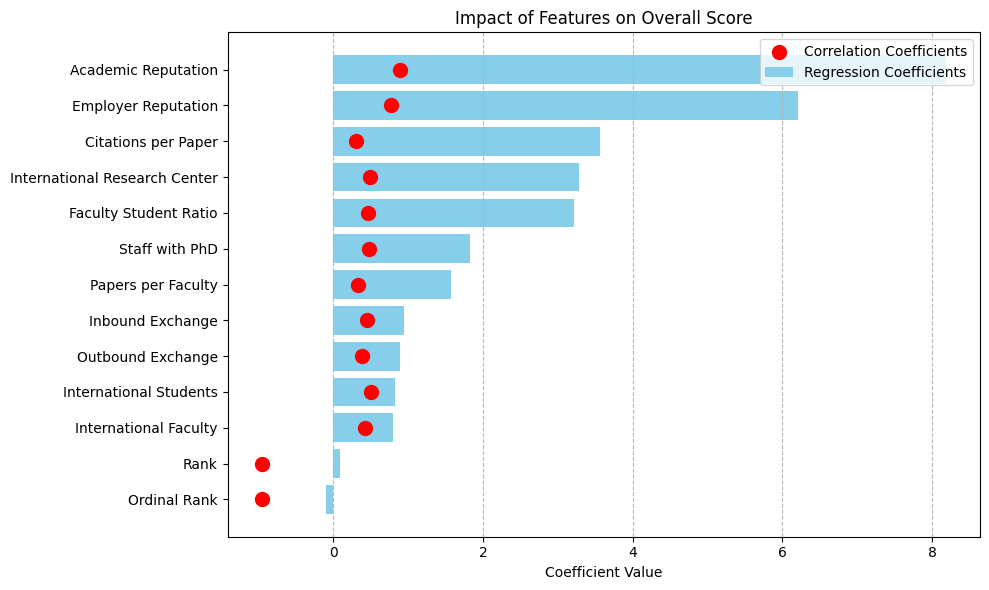

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# サンプルデータの準備（データフレームdfを使用）
# 'Overall Score'列は目的変数、他の列は特徴量
features = df.drop(columns=['Overall Score', 'Country','University Name', 'City'])  # 'Overall Score'以外の指標を対象
target = df['Overall Score']  # 目的変数（Overall Score）

# 相関係数を計算（各特徴量とOverall Scoreとの相関）
correlation = features.corrwith(target).sort_values(ascending=False)

# 線形回帰モデルを作成（元のコード通り）
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 線形回帰モデルを作成
model = LinearRegression()
model.fit(scaled_features, target)

# 各特徴量の回帰係数（どれくらい影響しているか）を確認
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_
})

# 絶対値を基に係数を並べ替え（影響度合い順）
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=True)

# 結果の表示（回帰係数）
print("\nRegression Coefficients (Impact on Overall Score):")
print(coefficients)

# 相関係数を回帰係数の順番に合わせて並べ替え
correlation_sorted = correlation[coefficients['Feature']]

# 1つのグラフにまとめるため、回帰係数のバーと相関係数の点をプロット
fig, ax1 = plt.subplots(figsize=(10, 6))

# 回帰係数のバー
ax1.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue', label='Regression Coefficients')
ax1.set_xlabel('Coefficient Value')
ax1.set_title('Impact of Features on Overall Score')
ax1.grid(axis='x', linestyle='--', alpha=0.9)

# 相関係数を点でプロット
ax1.scatter(correlation_sorted.values, correlation_sorted.index, color='red', zorder=5, label='Correlation Coefficients', s=100)

# レジェンドを追加
ax1.legend(loc='upper right')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


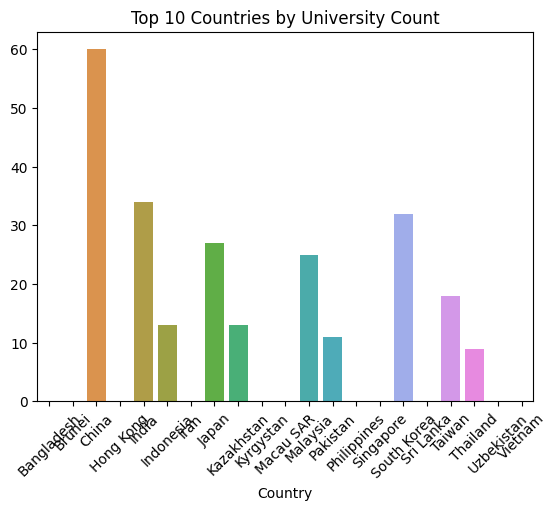

In [16]:
# Top 10 countries by number of universities
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by University Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Outlier detection using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} has {len(outliers)} outliers.")


Overall Score has 0 outliers.
Citations per Paper has 0 outliers.
Papers per Faculty has 0 outliers.
Academic Reputation has 0 outliers.
Faculty Student Ratio has 0 outliers.
International Students has 0 outliers.
International Research Center has 0 outliers.


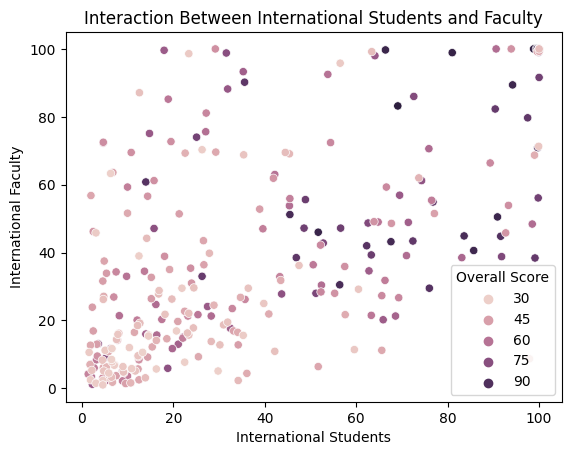

In [18]:
# Interaction between 'International Students' and 'International Faculty'
sns.scatterplot(x='International Students', y='International Faculty', hue='Overall Score', data=df)
plt.title('Interaction Between International Students and Faculty')
plt.show()


# Data Prep for img processing

In [22]:
# Drop irrelevant columns and encode categorical features
df = df.drop(['Rank', 'Ordinal Rank', 'University Name'], axis=1)

# Label encode categorical columns
encoder = LabelEncoder()
df['City'] = encoder.fit_transform(df['City'])
df['Country'] = encoder.fit_transform(df['Country'])

# Define features and target
X = df.drop('Overall Score', axis=1)
y = df['Overall Score']


KeyError: "['Rank', 'Ordinal Rank', 'University Name'] not found in axis"

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Prediction

In [ ]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


In [ ]:
# Feature importance
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


In [ ]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

# Stacking Regressor with Linear Regression, Random Forest, and SVR
stacking_model = StackingRegressor(
    estimators=[('lr', lr), ('rf', rf), ('svr', SVR(kernel='linear'))],
    final_estimator=LinearRegression()
)
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stack = stacking_model.predict(X_test)

# Evaluate
print("Stacking Regressor Performance:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stack)))
print("R2 Score:", r2_score(y_test, y_pred_stack))


# Save the model

In [ ]:
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

# Load the model for later use
# loaded_model = joblib.load('random_forest_model.pkl')
